In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import random

C:\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
energy = pd.read_csv(r"C:\Users\Admin\OneDrive\Desktop\KAG_energydata_complete.csv")
energy.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [3]:
#converting date into datetime
energy['date'] = energy['date'].astype('datetime64[ns]')
energy.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [4]:
#making the date, time, hour and month into a diff column and thus converting them into date time format
energy['Date'] = pd.to_datetime(energy['date']).dt.date
energy['Time'] = pd.to_datetime(energy['date']).dt.time
energy['hour'] = energy['date'].dt.hour
energy['month'] = energy['date'].dt.month
energy['week'] = energy['date'].dt.isocalendar().week

In [5]:
energy.drop(['Date', 'Time'], axis = 1 , inplace = True)

In [6]:
energy1 = energy.iloc[ : , 1:32]
energy1

Appliances  lights         T1       RH_1         T2       RH_2  \
0              60      30  19.890000  47.596667  19.200000  44.790000   
1              60      30  19.890000  46.693333  19.200000  44.722500   
2              50      30  19.890000  46.300000  19.200000  44.626667   
3              50      40  19.890000  46.066667  19.200000  44.590000   
4              60      40  19.890000  46.333333  19.200000  44.530000   
...           ...     ...        ...        ...        ...        ...   
19730         100       0  25.566667  46.560000  25.890000  42.025714   
19731          90       0  25.500000  46.500000  25.754000  42.080000   
19732         270      10  25.500000  46.596667  25.628571  42.768571   
19733         420      10  25.500000  46.990000  25.414000  43.036000   
19734         430      10  25.500000  46.600000  25.264286  42.971429   

              T3       RH_3         T4       RH_4  ...  Press_mm_hg  \
0      19.790000  44.730000  19.000000  45.566667  ...        733.5   
1      19.790000  44.790000  19.000000  45.992500  ...        733.6   
2      19.790000  44.933333  18.926667  45.890000  ...        733.7   
3      19.790000  45.000000  18.890000  45.723333  ...        733.8   
4      19.790000  45.000000  18.890000  45.530000  ...        733.9   
...          ...        ...        ...        ...  ...          ...   
19730  27.200000  41.163333  24.700000  45.590000  ...        755.2   
19731  27.133333  41.223333  24.700000  45.590000  ...        755.2   
19732  27.050000  41.690000  24.700000  45.730000  ...        755.2   
19733  26.890000  41.290000  24.700000  45.790000  ...        755.2   
19734  26.823333  41.156667  24.700000  45.963333  ...        755.2   

          RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  \
0      92.000000   7.000000   63.000000   5.300000  13.275433  13.275433   
1      92.000000   6.666667   59.166667   5.200000  18.606195  18.606195   
2      92.000000   6.333333   55.333333   5.100000  28.642668  28.642668   
3      92.000000   6.000000   51.500000   5.000000  45.410389  45.410389   
4      92.000000   5.666667   47.666667   4.900000  10.084097  10.084097   
...          ...        ...         ...        ...        ...        ...   
19730  55.666667   3.333333   23.666667  13.333333  43.096812  43.096812   
19731  56.000000   3.500000   24.500000  13.300000  49.282940  49.282940   
19732  56.333333   3.666667   25.333333  13.266667  29.199117  29.199117   
19733  56.666667   3.833333   26.166667  13.233333   6.322784   6.322784   
19734  57.000000   4.000000   27.000000  13.200000  34.118851  34.118851   

       hour  month  week  
0        17      1     2  
1        17      1     2  
2        17      1     2  
3        17      1     2  
4        17      1     2  
...     ...    ...   ...  
19730    17      5    21  
19731    17      5    21  
19732    17      5    21  
19733    17      5    21  
19734    18      5    21  

[19735 rows x 31 columns]

In [7]:
#creating feature vector
feature = energy1.iloc[:, 1:31]
feature

lights         T1       RH_1         T2       RH_2         T3  \
0          30  19.890000  47.596667  19.200000  44.790000  19.790000   
1          30  19.890000  46.693333  19.200000  44.722500  19.790000   
2          30  19.890000  46.300000  19.200000  44.626667  19.790000   
3          40  19.890000  46.066667  19.200000  44.590000  19.790000   
4          40  19.890000  46.333333  19.200000  44.530000  19.790000   
...       ...        ...        ...        ...        ...        ...   
19730       0  25.566667  46.560000  25.890000  42.025714  27.200000   
19731       0  25.500000  46.500000  25.754000  42.080000  27.133333   
19732      10  25.500000  46.596667  25.628571  42.768571  27.050000   
19733      10  25.500000  46.990000  25.414000  43.036000  26.890000   
19734      10  25.500000  46.600000  25.264286  42.971429  26.823333   

            RH_3         T4       RH_4         T5  ...  Press_mm_hg  \
0      44.730000  19.000000  45.566667  17.166667  ...        733.5   
1      44.790000  19.000000  45.992500  17.166667  ...        733.6   
2      44.933333  18.926667  45.890000  17.166667  ...        733.7   
3      45.000000  18.890000  45.723333  17.166667  ...        733.8   
4      45.000000  18.890000  45.530000  17.200000  ...        733.9   
...          ...        ...        ...        ...  ...          ...   
19730  41.163333  24.700000  45.590000  23.200000  ...        755.2   
19731  41.223333  24.700000  45.590000  23.230000  ...        755.2   
19732  41.690000  24.700000  45.730000  23.230000  ...        755.2   
19733  41.290000  24.700000  45.790000  23.200000  ...        755.2   
19734  41.156667  24.700000  45.963333  23.200000  ...        755.2   

          RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  \
0      92.000000   7.000000   63.000000   5.300000  13.275433  13.275433   
1      92.000000   6.666667   59.166667   5.200000  18.606195  18.606195   
2      92.000000   6.333333   55.333333   5.100000  28.642668  28.642668   
3      92.000000   6.000000   51.500000   5.000000  45.410389  45.410389   
4      92.000000   5.666667   47.666667   4.900000  10.084097  10.084097   
...          ...        ...         ...        ...        ...        ...   
19730  55.666667   3.333333   23.666667  13.333333  43.096812  43.096812   
19731  56.000000   3.500000   24.500000  13.300000  49.282940  49.282940   
19732  56.333333   3.666667   25.333333  13.266667  29.199117  29.199117   
19733  56.666667   3.833333   26.166667  13.233333   6.322784   6.322784   
19734  57.000000   4.000000   27.000000  13.200000  34.118851  34.118851   

       hour  month  week  
0        17      1     2  
1        17      1     2  
2        17      1     2  
3        17      1     2  
4        17      1     2  
...     ...    ...   ...  
19730    17      5    21  
19731    17      5    21  
19732    17      5    21  
19733    17      5    21  
19734    18      5    21  

[19735 rows x 30 columns]

In [8]:
#splitting into test and train
X = feature
y = energy['Appliances']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=40)

In [9]:
#splitting into test and train
train, test = train_test_split(energy1,test_size=0.25,random_state=25)

In [10]:
#divide the columns based on type
col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg","Windspeed","Visibility"] 
col_light = ["lights"]
col_randoms = ["rv1", "rv2"]
col_target = ["Appliances"]
col_time = ['hour', 'month']

In [11]:
# Seperate dependent and independent variables 
feature_vars = train[col_temp + col_hum + col_weather + col_light + col_randoms + col_time]
target_vars = train[col_target]

In [13]:
feature.corr()

lights        T1      RH_1        T2      RH_2        T3  \
lights       1.000000 -0.023528  0.106968 -0.005622  0.050985 -0.097393   
T1          -0.023528  1.000000  0.164006  0.836834 -0.002509  0.892402   
RH_1         0.106968  0.164006  1.000000  0.269839  0.797535  0.253230   
T2          -0.005622  0.836834  0.269839  1.000000 -0.165610  0.735245   
RH_2         0.050985 -0.002509  0.797535 -0.165610  1.000000  0.137319   
T3          -0.097393  0.892402  0.253230  0.735245  0.137319  1.000000   
RH_3         0.131161 -0.028550  0.844677  0.121497  0.678326 -0.011234   
T4          -0.008859  0.877001  0.106180  0.762066 -0.047304  0.852778   
RH_4         0.114936  0.097861  0.880359  0.231563  0.721435  0.122737   
T5          -0.078745  0.885247  0.205797  0.720550  0.110409  0.888169   
RH_5         0.141233 -0.014782  0.303258  0.029595  0.250271 -0.066355   
T6          -0.079029  0.654769  0.316141  0.801186 -0.009670  0.686882   
RH_6         0.153756 -0.615045  0.245126 -0.580372  0.389933 -0.647672   
T7          -0.135347  0.838705  0.021397  0.663660 -0.051422  0.847374   
RH_7         0.035069  0.135182  0.801122  0.229212  0.690584  0.172624   
T8          -0.071458  0.825413 -0.030053  0.578191 -0.041023  0.795283   
RH_8         0.012915 -0.006441  0.736196  0.068534  0.679777  0.044427   
T9          -0.157592  0.844777  0.115263  0.675535  0.054544  0.901324   
RH_9        -0.008766  0.071756  0.764001  0.157346  0.676467  0.134602   
T_out       -0.074424  0.682846  0.340767  0.792255  0.033674  0.699417   
Press_mm_hg -0.010576 -0.150574 -0.293957 -0.133028 -0.255646 -0.189974   
RH_out       0.068543 -0.345481  0.274126 -0.505291  0.584911 -0.281718   
Windspeed    0.060281 -0.087654  0.204932  0.052495  0.069190 -0.100776   
Visibility   0.020038 -0.076210 -0.021057 -0.069721 -0.005368 -0.102310   
Tdewpoint   -0.036322  0.571309  0.639106  0.582602  0.499152  0.645886   
rv1          0.000521 -0.006203 -0.000699 -0.011087  0.006275 -0.005194   
rv2          0.000521 -0.006203 -0.000699 -0.011087  0.006275 -0.005194   
hour         0.255346  0.178858  0.018594  0.254784 -0.183322  0.037624   
month       -0.179452  0.706305 -0.094048  0.533479 -0.097914  0.790365   

                 RH_3        T4      RH_4        T5  ...     T_out  \
lights       0.131161 -0.008859  0.114936 -0.078745  ... -0.074424   
T1          -0.028550  0.877001  0.097861  0.885247  ...  0.682846   
RH_1         0.844677  0.106180  0.880359  0.205797  ...  0.340767   
T2           0.121497  0.762066  0.231563  0.720550  ...  0.792255   
RH_2         0.678326 -0.047304  0.721435  0.110409  ...  0.033674   
T3          -0.011234  0.852778  0.122737  0.888169  ...  0.699417   
RH_3         1.000000 -0.140457  0.898978 -0.050062  ...  0.118207   
T4          -0.140457  1.000000 -0.048650  0.871813  ...  0.663478   
RH_4         0.898978 -0.048650  1.000000  0.091812  ...  0.293289   
T5          -0.050062  0.871813  0.091812  1.000000  ...  0.651321   
RH_5         0.375422 -0.076489  0.352591  0.032786  ... -0.053126   
T6           0.076833  0.652350  0.259047  0.629161  ...  0.974787   
RH_6         0.514912 -0.703149  0.392178 -0.632384  ... -0.641572   
T7          -0.250090  0.877763 -0.131204  0.870624  ...  0.631293   
RH_7         0.832685  0.043527  0.894301  0.148905  ...  0.294199   
T8          -0.283228  0.796256 -0.167066  0.824981  ...  0.502842   
RH_8         0.828822 -0.095192  0.847259  0.016388  ...  0.117141   
T9          -0.195270  0.889439 -0.044518  0.911055  ...  0.668220   
RH_9         0.833538 -0.025549  0.856591  0.072308  ...  0.223270   
T_out        0.118207  0.663478  0.293289  0.651321  ...  1.000000   
Press_mm_hg -0.233274 -0.075292 -0.250748 -0.170999  ... -0.143249   
RH_out       0.356192 -0.388602  0.336813 -0.273953  ... -0.574197   
Windspeed    0.263188 -0.185747  0.300192 -0.145011  ...  0.192936   
Visibility   0.017041 -0.104768  0.002636 -0.084164  ... -0.077367   
Tdewpoint    0

<AxesSubplot:>

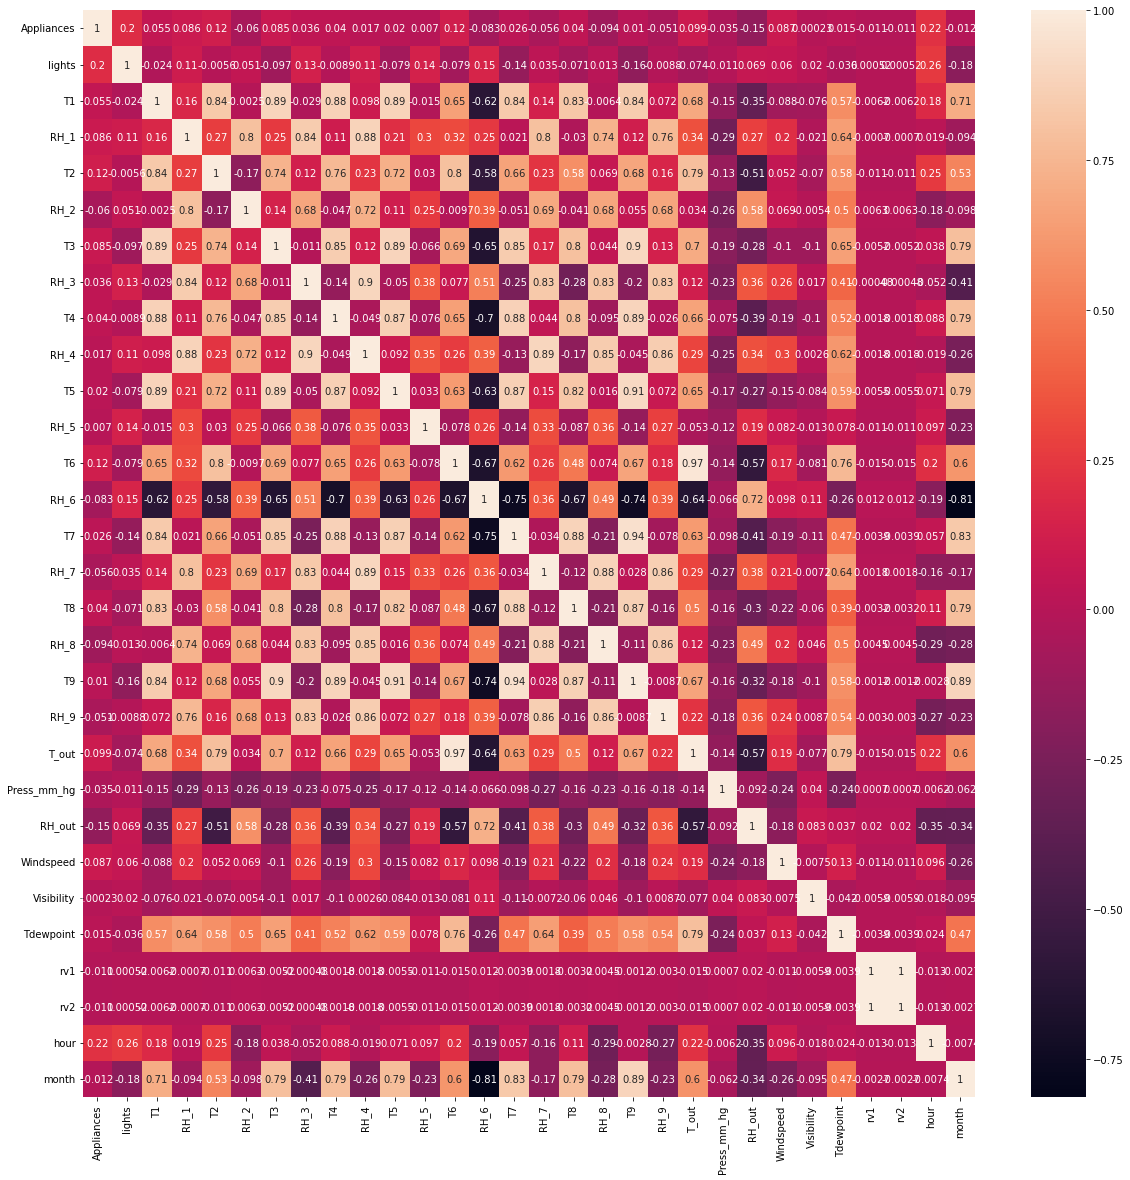

In [15]:
#annot is used to make sure the corr numbers are see on the figure, if given as false, the number dont appear
plt.figure(figsize = (20,20))
sns.heatmap(energy1.corr(), annot = True)

[Text(0.5, 1.0, 'Appliances vs hour')]

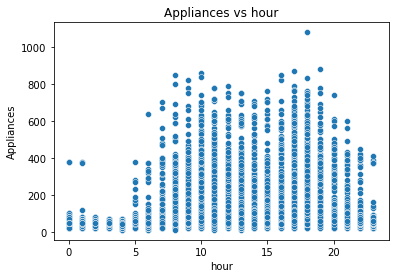

In [25]:
sns.scatterplot(x = "hour" , y = "Appliances", data = train).set(title = 'Appliances vs hour')

[Text(0.5, 1.0, 'Appliances vs hour')]

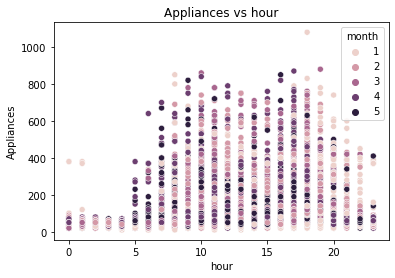

In [26]:
sns.scatterplot(x = "hour" , y = "Appliances", data = train, hue = 'month').set(title = 'Appliances vs hour')

[Text(0.5, 1.0, 'RH_6 vs T7')]

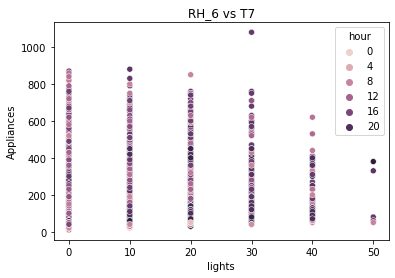

In [29]:
sns.scatterplot(x = "lights" , y = "Appliances", data = train, hue='hour').set(title = 'RH_6 vs T7')

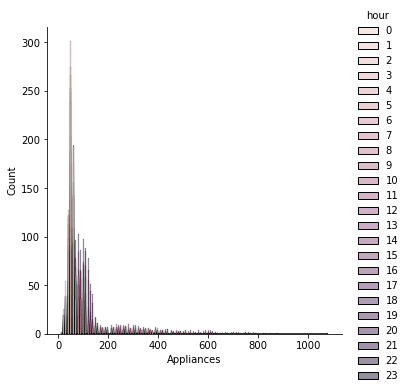

In [30]:
sns.displot(data = train , x ="Appliances" , hue = 'hour')

In [12]:
fig = px.pie(energy,values='Appliances', names='hour')
fig.show()

In [13]:
fig = px.pie(energy,values='lights', names='hour')
fig.show()

In [14]:
fig = px.pie(energy,values='Appliances', names='month')
fig.show()

In [15]:
fig = px.pie(energy,values='lights', names='month')
fig.show()

In [16]:
fig = px.pie(energy,values='lights')
fig.show()

In [28]:
fig = px.pie(energy,values='Appliances', names='month')
fig.show()

<AxesSubplot:>

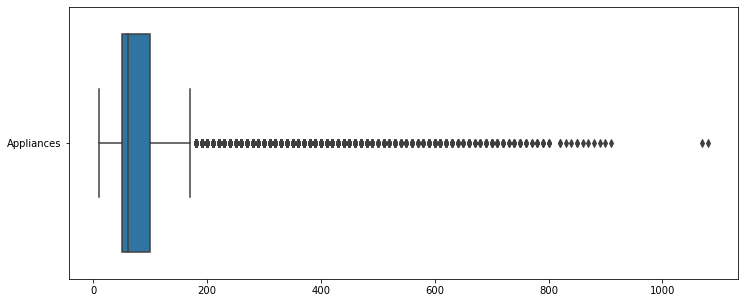

In [26]:
plt.figure(figsize=(12,5)) # set the figure size to 10 inches by 6 inches
sns.boxplot(data=energy1[['Appliances']], orient='h')

Text(0.5, 1.0, 'Distribution of appliances power consumption across the dataset')

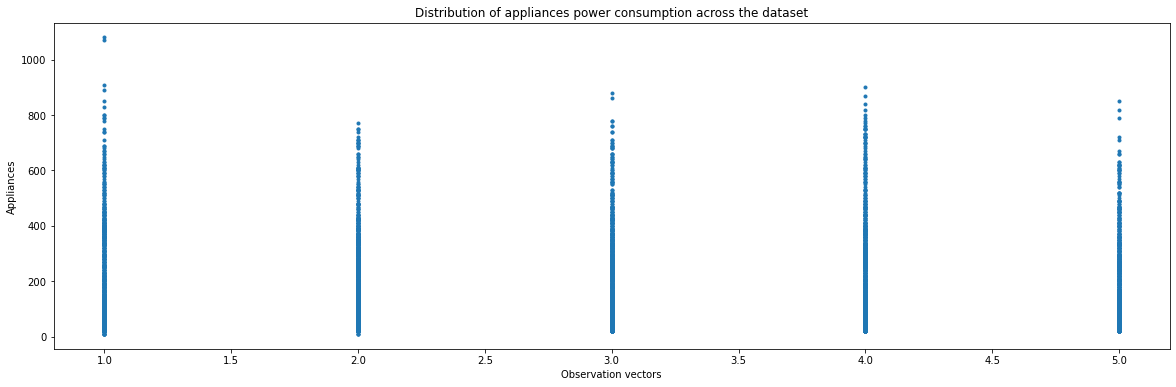

In [20]:
y = energy['Appliances']
x = energy['month']
fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(x,y,marker='.', linestyle='', linewidth=0.5, label='Monthly')
ax.set_xlabel('Observation vectors')
ax.set_ylabel('Appliances')
ax.set_title('Distribution of appliances power consumption across the dataset')

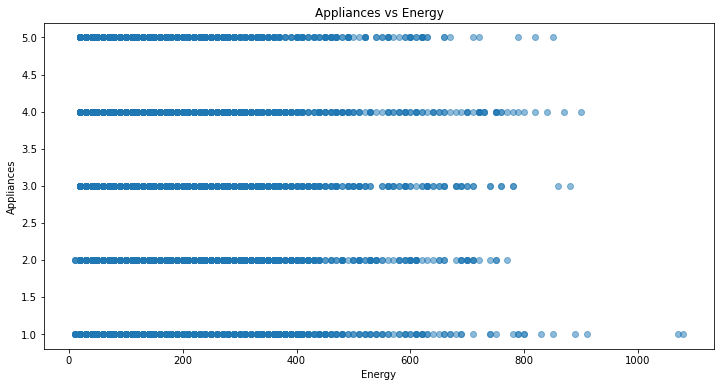

In [16]:
import matplotlib.pyplot as plt

# Assuming the data is stored in a pandas DataFrame called 'energy'
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Appliances vs Energy
ax.scatter(energy['Appliances'], energy['month'], marker='o', alpha=0.5)
ax.set_xlabel('Energy')
ax.set_ylabel('Appliances')
ax.set_title('Appliances vs Energy')

plt.show()





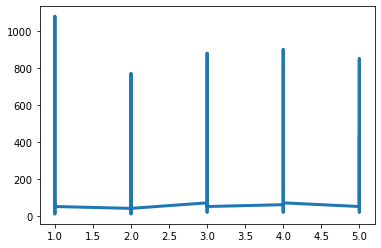

In [17]:
months = energy1['month']
app = energy1['Appliances']
plt.plot(months,app,linewidth=3)

In [22]:
new_df = energy1[['Appliances','month']].copy()
new_df

Appliances  month
0              60      1
1              60      1
2              50      1
3              50      1
4              60      1
...           ...    ...
19730         100      5
19731          90      5
19732         270      5
19733         420      5
19734         430      5

[19735 rows x 2 columns]

<AxesSubplot:xlabel='Appliances'>

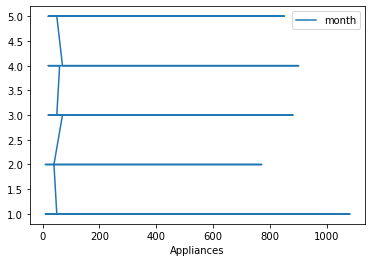

In [23]:
new_df.plot('Appliances' , 'month' )

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
# fit the model
model = ExtraTreesRegressor()
model.fit(X_train, y_train)
# evaluate the model
pred = model.predict(X_test) 
# evaluate predictions
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))
mae = mean_absolute_error(y_test,pred)
print("MAE : % f" %(mae))
print("R2 : % f" %(model.score(X_test,y_test)))

RMSE :  65.031549
MAE :  30.401216
R2 :  0.587908


In [19]:
from sklearn.inspection import permutation_importance
feature_names = ('lights','T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4',
                 'T5','RH_5','T6','RH_6','T7','RH_7','T8','RH_8','T9','RH_9','T_out',
                 'Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','rv1','rv2', 'hour', 'month', 'week')
sort = model.feature_importances_.argsort()
plt.barh(feature_names[sort], model.feature_importances_[sort])
plt.xlabel("Feature Importance")

TypeError: only integer scalar arrays can be converted to a scalar index

Feature 0: 0.050751
Feature 1: 0.102765
Feature 2: 0.081426
Feature 3: 0.095519
Feature 4: 0.065592
Feature 5: 0.115389
Feature 6: 0.063318
Feature 7: 0.105951
Feature 8: 0.072390
Feature 9: 0.108727
Feature 10: 0.069743
Feature 11: 0.082018
Feature 12: 0.105868
Feature 13: 0.111841
Feature 14: 0.064492
Feature 15: 0.107761
Feature 16: 0.072888
Feature 17: 0.124835
Feature 18: 0.070168
Feature 19: 0.076905
Feature 20: 0.077017
Feature 21: 0.068116
Feature 22: 0.022669
Feature 23: 0.022062
Feature 24: 0.042444
Feature 25: 0.005088
Feature 26: 0.005088
Feature 27: 0.290584
Feature 28: 0.048275
Feature 29: 0.073011


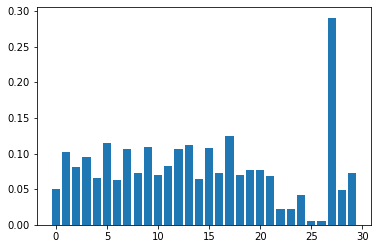

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
# feature selection
def select_features(X_train, y_train, X_test):
 # configure to select all features
 fs = SelectKBest(score_func=mutual_info_regression, k='all')
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
 print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

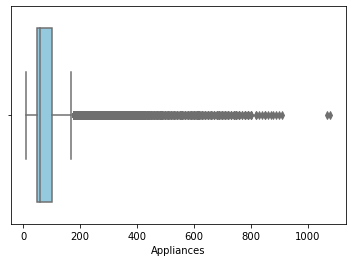

In [15]:
sns.boxplot(x='Appliances', data=energy1, color='skyblue')
# plt.title('Boxplot of Appliances')
# plt.figure(figsize=(20,15))
plt.show()

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

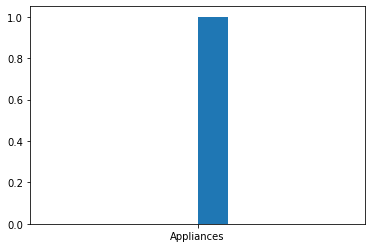

In [16]:
plt.hist('Appliances', bins=10)